(200, 300)
[[13813562.             +0.j           310048.85044042+472285.77950811j
    117190.34615393+817468.20645989j ...
    517614.6110121 +624728.1215645j    117190.34615393-817468.20645989j
    310048.85044042-472285.77950811j]
 [  454067.05917449-315764.16986921j  -384913.54675867+304631.68265196j
   -143016.79763203-540590.70213454j ...
     77546.54546292-108325.42718417j   702231.80385984 -74082.06978641j
   -631171.08499068-176966.48600287j]
 [  362121.53281606 +20703.05653644j   -20757.4779215 -984695.45510947j
   -440802.58192486+205942.57934797j ...
    -65622.10513192 +50254.04489204j  -505145.5574677 +468727.48239244j
    743057.90080767+211242.13919183j]
 ...
 [   69357.6750959 +219200.3801796j    100677.39105446-199932.94387235j
     59573.07363906-173187.01348223j ...
    135769.89511294+112932.36075093j    32153.87887167 +82161.13479492j
     31466.74598708-160105.52209819j]
 [  362121.53281606 -20703.05653644j   743057.90080767-211242.13919183j
   -505145.5574677 -

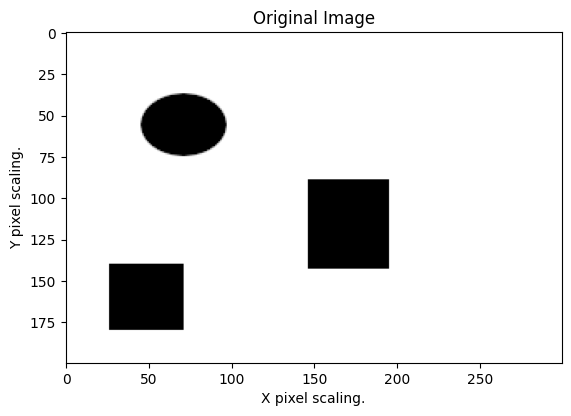

In [558]:
import numpy as np
import matplotlib.pyplot as plt
import math

data = np.fromfile("../Images/data_rectangle.raw", dtype=np.float32)

data = np.reshape(data, (200,300))

print(data.shape)

N = data.shape[0] * data.shape[1]

G = np.zeros(N, dtype=complex)
G = np.fft.fft2(data)
print(G)

delta = 45

for k in range(0,200):
    for j in range(0, 300):
        U = G[k][j]
        e = np.exp(-2j * np.pi * k * j * delta)  
        G[k][j] = U * e
        
        
for k in range(0,200):
    for j in range(0, 300):
        e = np.exp(-2j * np.pi * k * j * delta)            
        G[k][j] = G[k][j] * e
        
        
# for k in range(0,200):
#     for j in range(0, 300):
#         e = np.exp(-2j * np.pi * k * j * delta)            
#         G[k][j] = G[k][j] * e
        

        
    
    
final_output = np.zeros(N, dtype=complex)
final_output = np.fft.ifft2(G)

# final_output = np.reshape(final_output.real,(200,300))

plt.title("Original Image")
plt.xlabel("X pixel scaling.")
plt.ylabel("Y pixel scaling.")

# Visualize the data as an image
plt.imshow(final_output.real, cmap='gray')
# plt.imshow(np.reshape(data, (200,300)), cmap='gray')
plt.show()